## Arctic Heat - Fall 2018

**AXCTD and XBT Profiles - all QC'd**

Purpose: plot cleaned XBT and AXCTD files 

Removed files with no data, truncated files to have only data once water was hit.  Bottom depth is estimated by nearest point to the ARDEMv2 Bathymetry Grid.   
[ArdemV2_Depth_Finder.ipynb](ArdemV2_Depth_Finder.ipynb).

In [1]:
import pandas as pd
import os
import datetime
import numpy as np

In [2]:
source_dir = '/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/'

source_file = [os.path.join(dp, f) for dp, dn,
   fn in os.walk(os.path.expanduser(source_dir)) for f in fn if 'clean.dta' in f]


### Data Ingestion and data summary/statistics

A few lines to list and read the .iwg files into a dictionary of pandas dataframes.

The original .dta files have header as follows:   

```
Probe Type = AXBT     
       Date = 2018/05/26
       Time = 00:29:35.620
 
    Time     Depth    Frequency    (C)       (F) 
```

In [3]:
dfs = {}
for i,filename in enumerate(sorted(source_file)):
    try:
        header = pd.read_csv(filename,nrows=4,header=None)
        
        #parse date in header to add delta-t in columns to
        sd = header[0][1].split('= ')[-1].split('.')
        nofrag, frag = header[0][2].split('= ')[-1].split('.')
        st = datetime.datetime.strptime(sd[0] + ' ' + nofrag,'%Y/%m/%d %H:%M:%S')
        st = st.replace(microsecond=int(frag))
        
        columns = ['Time','Depth','Frequency','DegreeC','DegreeF']
        temp_data = pd.read_csv(filename,delimiter='\s+',skiprows=4,na_values='******')
        temp_data['DateTime'] = [st +datetime.timedelta(seconds=x[1]['Time']) for x in temp_data.iterrows()]
        temp_data = temp_data.set_index(pd.DatetimeIndex(temp_data['DateTime']))
        dfs.update({filename:temp_data})
        print(filename)
    except ValueError:
        print("{} failed to load".format(filename))
        continue
    except KeyError:
        columns = ['Frame#','Data','CRC','Depth','Temp','Cond','Salinity']
        temp_data = pd.read_csv(filename,delimiter='\s+',skiprows=4,na_values='*****')
        dfs.update({filename:temp_data})
        print(filename)    

/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/AXBT_20180525/log00002.clean.dta
/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/AXBT_20180525/log00003.clean.dta
/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/AXBT_20180525/log00004.clean.dta
/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/AXBT_20180527/log00000.clean.dta
/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/AXBT_20180527/log00001.clean.dta
/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/AXBT_20180527/log00002.clean.dta
/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/AXBT_20180527/log00003.clean.dta
/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/AXBT_20180529/log00002.clean.dta
/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/AXBT_20180529/log00003.clean.dta
/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/AXBT_20180529/log00004.clean.dta


## XBT

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

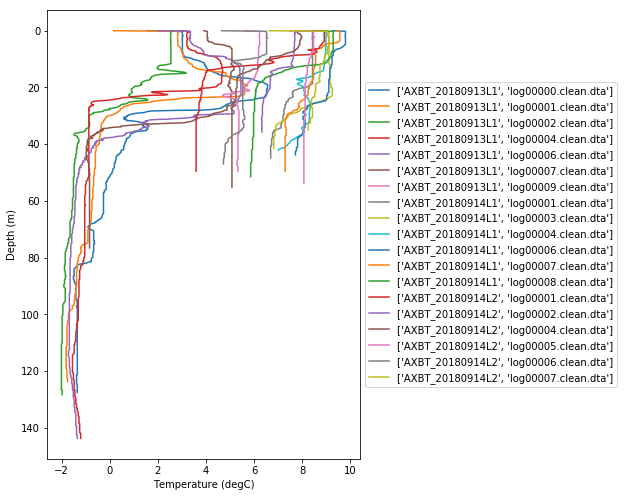

In [15]:
fig, ax = plt.subplots(figsize=(7,8.25))
for ds, df in dfs.items():
    if '201805' not in ds:
        try:
            ax.plot(df['(C)'],df['Depth'],label=ds.split('/')[-2:])

        except:
            pass

plt.ylabel('Depth (m)')
plt.xlabel('Temperature (degC)')    
ax.invert_yaxis()

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


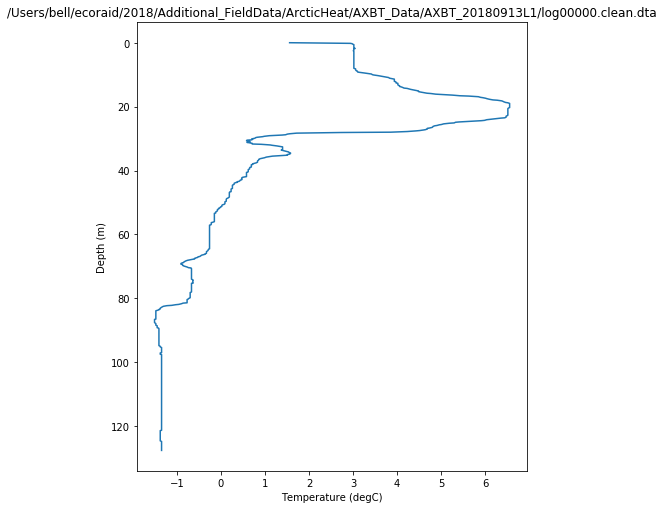

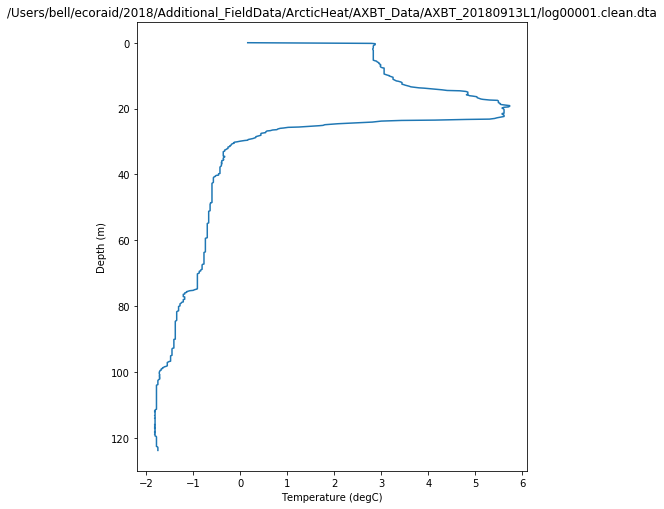

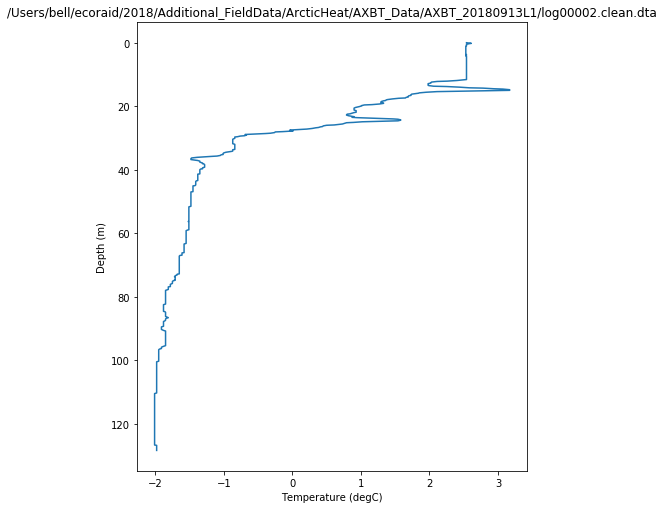

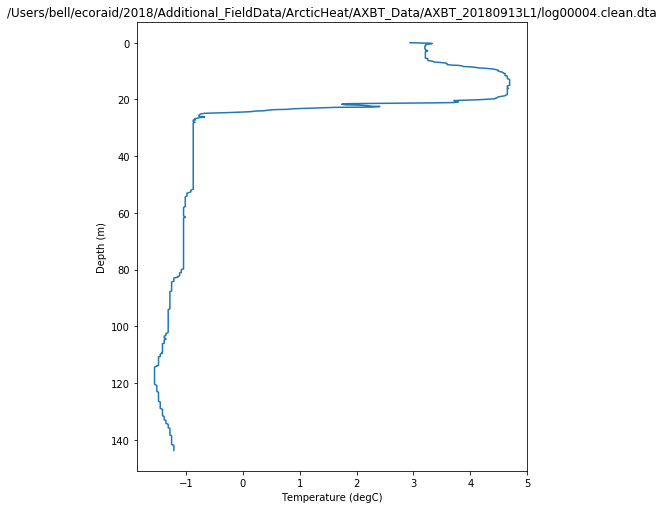

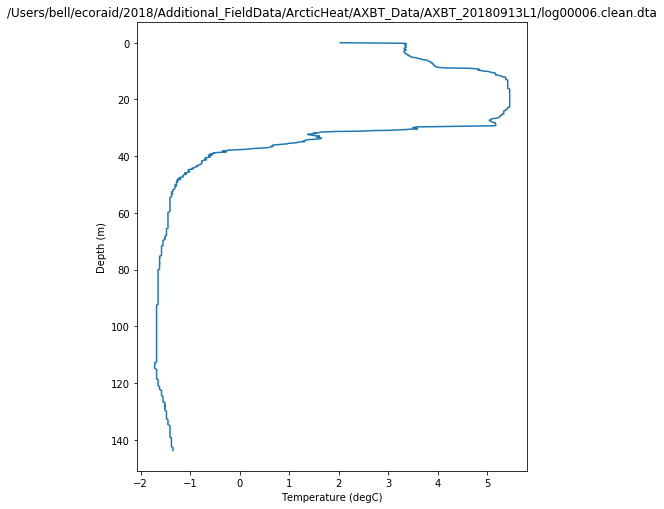

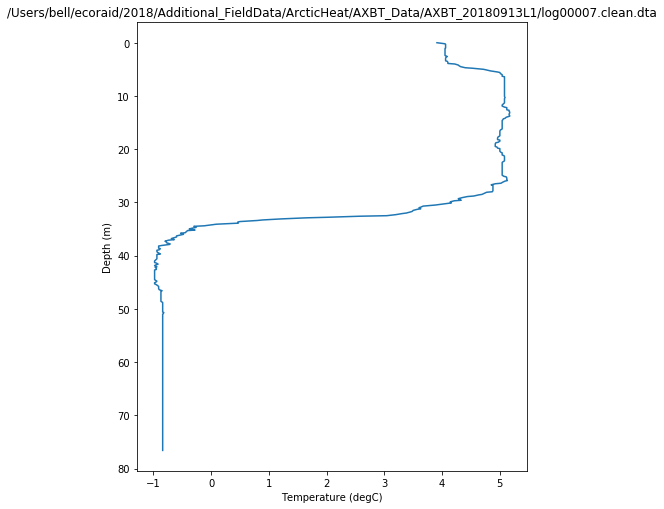

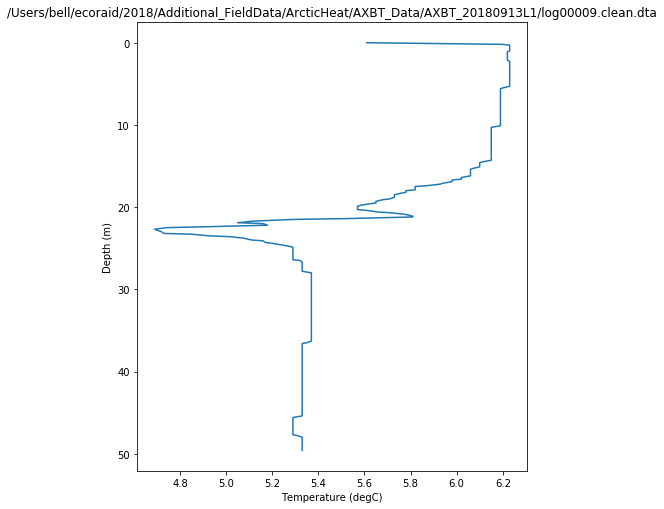

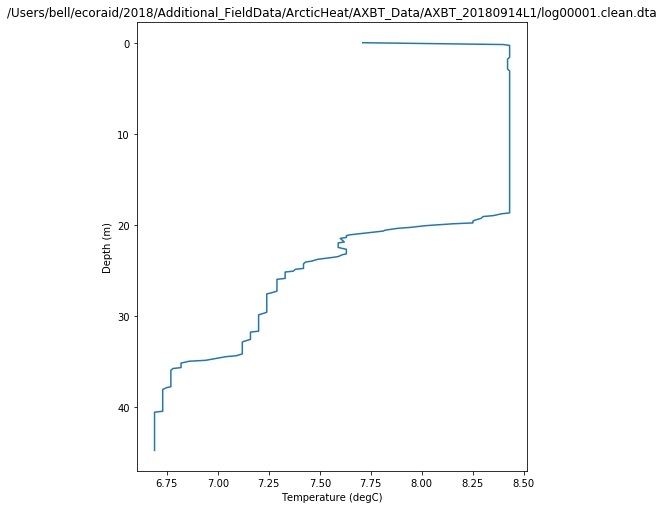

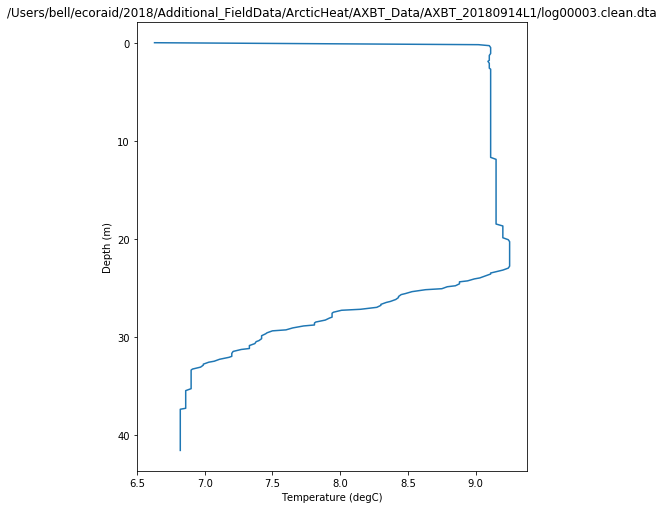

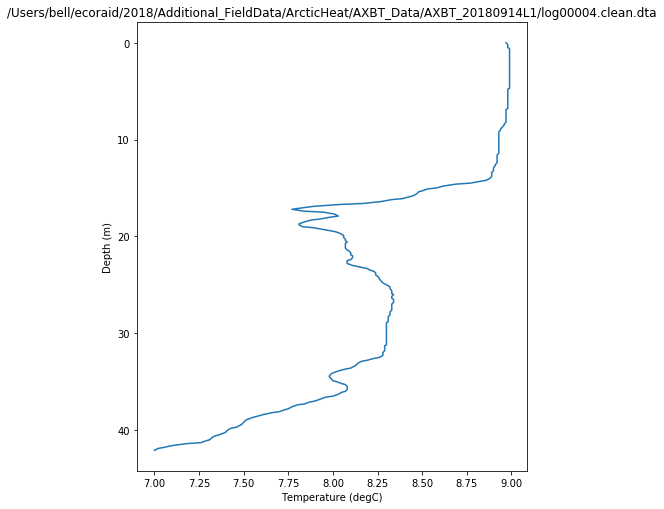

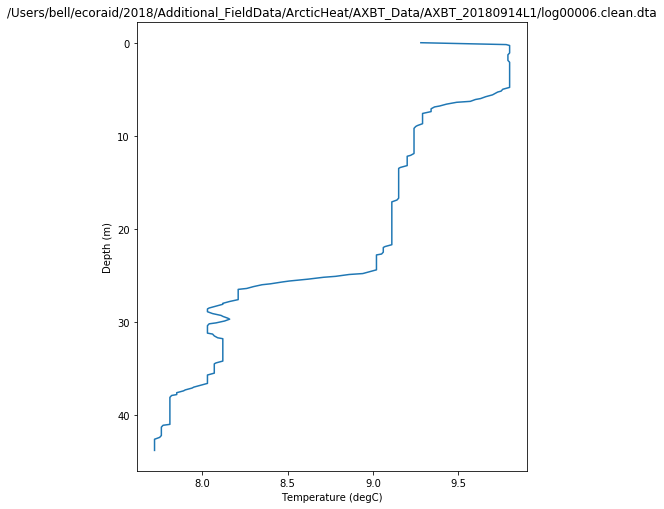

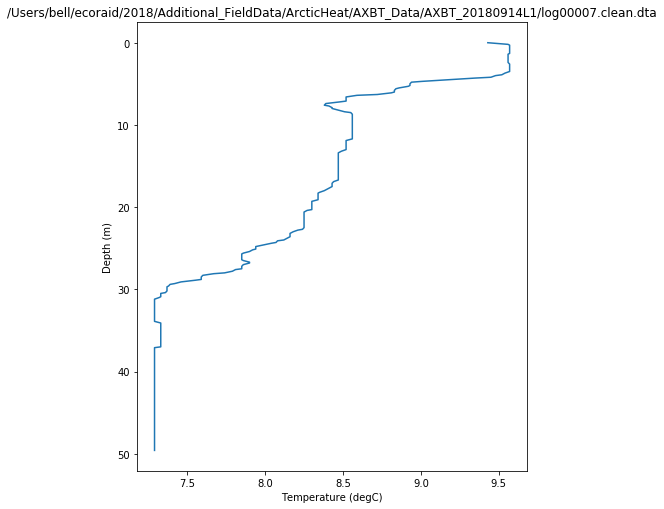

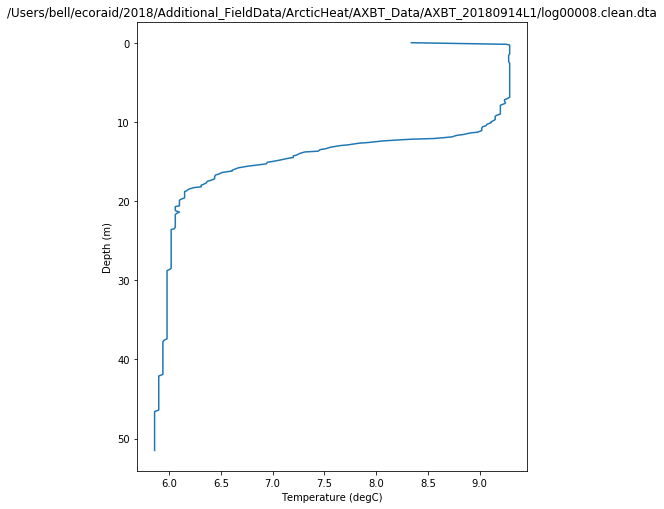

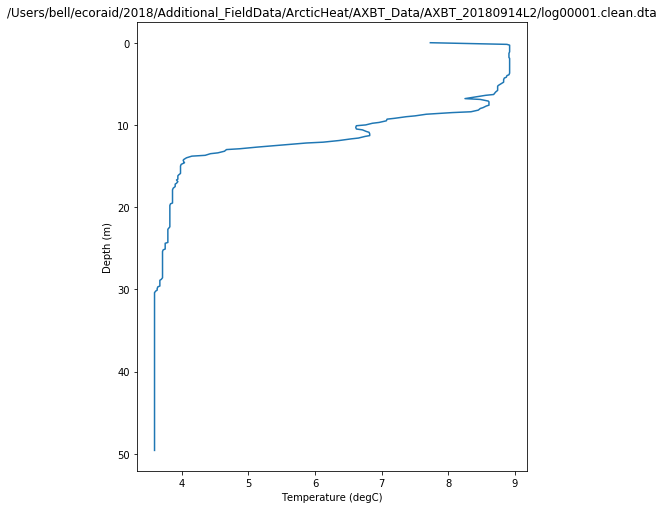

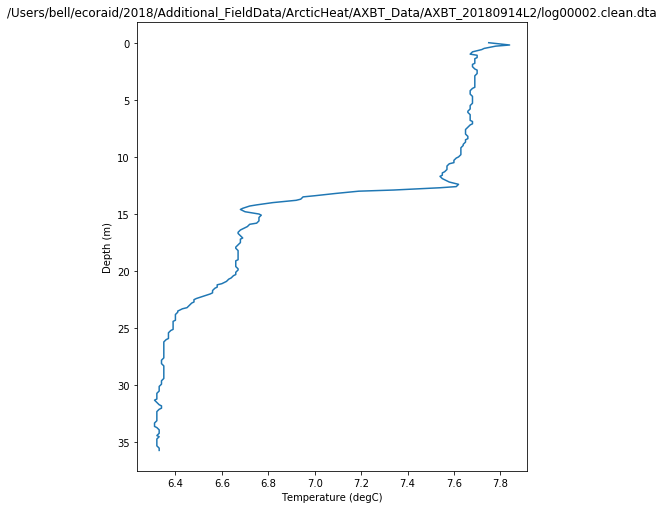

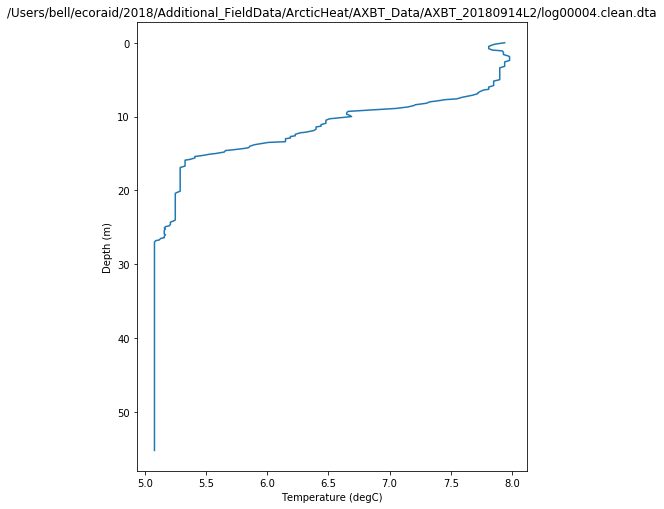

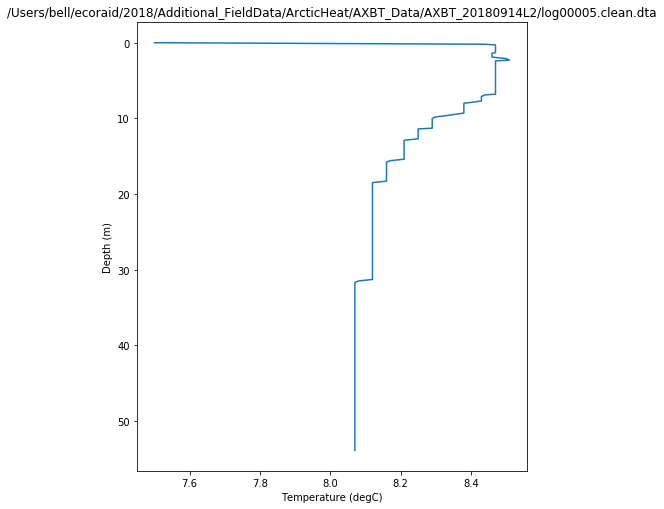

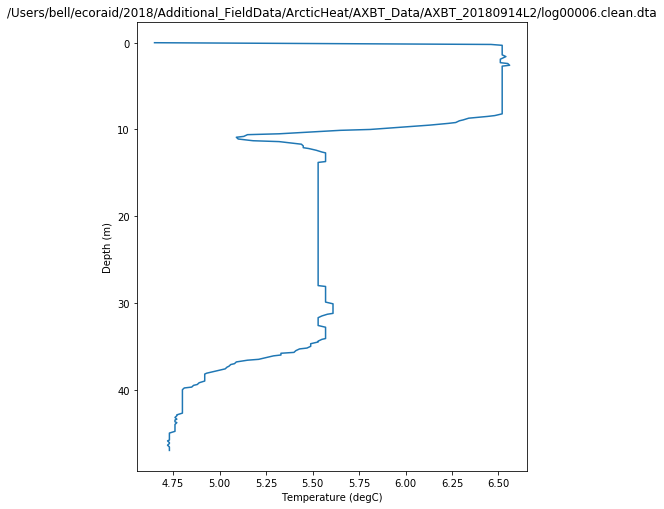

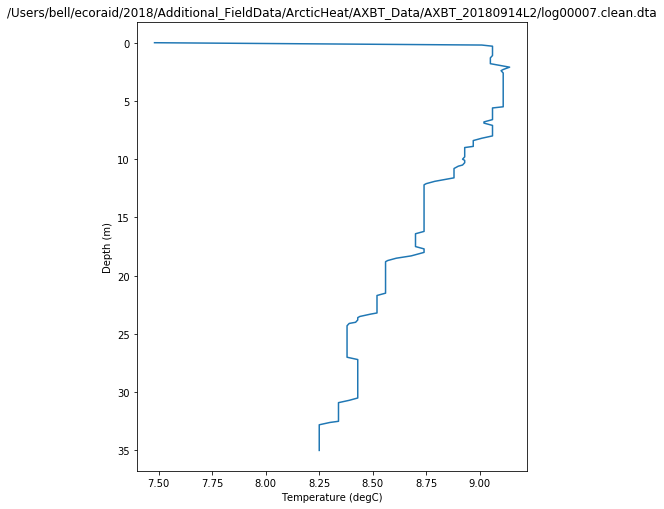

In [17]:
for ds, df in dfs.items():
    if '201805' not in ds:
        fig, ax = plt.subplots(figsize=(7,8.25))
        try:
            plt.plot(df['(C)'],df['Depth'])
            plt.ylabel('Depth (m)')
            plt.xlabel('Temperature (degC)')
            ax = plt.gca()
            ax.invert_yaxis()
            plt.title(ds)
        except:
            pass
    


### AXCTD

NO AXCTD on Fall 2018 Flights

### The flights of fall are designed to give a transect of the Chukchi from South to North

See (AXCTD-XBT Flight Ops Locations Fall2018.ipynb)

So contour as a function of Lat (or distance along transect)